In [3]:
#Descargamos los archivos del repositorio
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP2/metalgrid.jpg

--2022-03-31 18:29:09--  http://coordcrom_1.png/
Resolving coordcrom_1.png (coordcrom_1.png)... failed: Name or service not known.
wget: unable to resolve host address ‘coordcrom_1.png’
--2022-03-31 18:29:09--  https://github.com/juannieu/VPC1/raw/main/TP2/metalgrid.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP2/metalgrid.jpg [following]
--2022-03-31 18:29:10--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP2/metalgrid.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68046 (66K) [image/jpeg]
Saving to: ‘metalgrid.jpg’

metalgrid.jpg       100%[========

In [4]:
#Importamos las librerías que queremos utilizar
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#Cargamos la Imagen
imagen=cv.imread('metalgrid.jpg')

#Transformamos la Imagen a Escala de Grises
imagenEnGrises=cv.cvtColor(imagen,cv.COLOR_BGR2GRAY)

1. Calcule los gradientes en la Imagen (dirección y módulo)

In [5]:
#Antes de aplicar Sobel Creo mi filtro Gaussiano para reducir el ruido
reduccionDeRuido=cv.GaussianBlur(imagenEnGrises,(5,5),0)

In [6]:
#Comenzamos aplicando Sobel en dirección X
sobelX=cv.Sobel(reduccionDeRuido,cv.CV_32F,1,0,ksize=3)
sobelAbsolutoX=np.absolute(sobelX)
sobelx8_bit=sobelAbsolutoX/sobelAbsolutoX.max()*255
sobelx8=np.uint(sobelx8_bit)

#Repetimos el proceso en Y
sobelY=cv.Sobel(reduccionDeRuido,cv.CV_32F,1,0,ksize=3)
sobelAbsolutoY=np.absolute(sobelY)
sobely8_bit=sobelAbsolutoY/sobelAbsolutoY.max()*255
sobely8=np.uint(sobely8_bit)

In [7]:
#Calculamos la magnitud
#Verifiqué que diera lo mismo usando la función np.hypot
magnitud=((sobelx8**2)+(sobely8**2))**(1/2)

#Pasamos a 8 bit
magnitud8b=magnitud/magnitud.max()*255
magnitud8b=np.uint8(magnitud8b)
print(magnitud8b)

#Hallamos la dirección
anguloRadianes=np.arctan(sobelY,sobelX)
anguloGrados=np.rad2deg(anguloRadianes)
print(anguloGrados)

[[ 0  9  1 ...  0  1  0]
 [ 0 27 18 ...  0  2  0]
 [ 0 76 67 ...  1  2  0]
 ...
 [ 0  2  5 ...  4  2  0]
 [ 0  0  0 ...  4  2  0]
 [ 0  0  0 ...  4  2  0]]
[[  0.       -85.23635  -63.434948 ...   0.       -63.434948   0.      ]
 [  0.       -88.40886  -87.61405  ...  45.       -71.56505    0.      ]
 [  0.       -89.42127  -89.34145  ...  63.434948 -75.96375    0.      ]
 ...
 [  0.        75.96375   82.87498  ...  80.537674  75.96375    0.      ]
 [  0.         0.        45.       ...  80.537674  75.96375    0.      ]
 [  0.         0.         0.       ...  80.537674  75.96375    0.      ]]


2. Muestre imágenes de ángulo y módulo

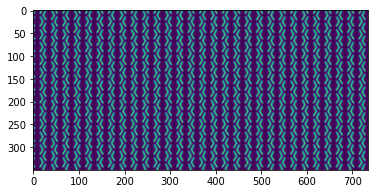

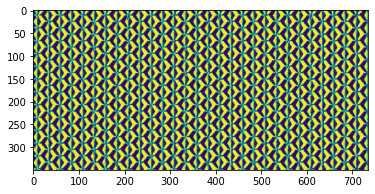

In [8]:
#Imagen del módulo
plt.figure()
plt.imshow(magnitud8b)
plt.show()

#Imagen del ángulo
plt.figure()
plt.imshow(anguloRadianes)
plt.show()

3. Marque con color las direcciones de gradientes más altos

-89.82532


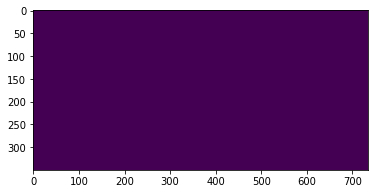

In [9]:
#TODO Primero tengo que encontrar cuál es la dirección de los gradientes más altos. Por ahora, voy a usar los de 75.96375

dX,dY=magnitud8b.shape
NoMaximos=np.zeros((dX,dY),dtype=np.uint8)

maxMagitud=magnitud8b.max()
indMaxMagnitudX,indMaxMagnitudY=np.where(magnitud8b==maxMagitud)

anguloMM=anguloGrados[indMaxMagnitudX,indMaxMagnitudY]
anguloM=anguloMM[0]

#------------------------Comentar esta Línea-----------------------------------
#anguloM=-45
#------------------------------------------------------------------------------

print(anguloM)
for i in range(1,dX-1):
  for j in range(1,dY-1):
      if(0<=anguloM<22.5) or (157.5<= anguloM <=180) or (-22.5<=anguloM<0) or (-180< anguloM<-157.5):
        b=magnitud8b[i,j+1]
        c=magnitud8b[i,j-1]
      elif(22.5<=anguloM<67.5) or (-157.5<= anguloM <=-112.5):
        b=magnitud8b[i+1,j+1]
        c=magnitud8b[i-1,j-1]
      elif(67.5<=anguloM<112.5) or (-112.5<= anguloM <=-67.5):
        b=magnitud8b[i+1,j]
        c=magnitud8b[i-1,j]
      elif(112.5<=anguloM<157.5) or (-67.5<= anguloM <=-22.5):
        b=magnitud8b[i+1,j-1]
        c=magnitud8b[i-1,j+1]

        if(magnitud8b[i,j]>=b) and(magnitud8b[i,j]>=c):
          NoMaximos[i,j]=magnitud8b[i,j]
        else:
          NoMaximos[i,j]=0

upperThreshold=21
lowerThreshold=15

dXMax, dYMax=NoMaximos.shape
salida=np.zeros((dXMax,dYMax),dtype=np.uint8)

fuerte_i, fuerte_j=np.where(NoMaximos>=upperThreshold)
debil_i,debil_j=np.where((NoMaximos<=upperThreshold)&(NoMaximos>=lowerThreshold))
ceros_i, ceros_j=np.where(NoMaximos<lowerThreshold)

salida[fuerte_i,fuerte_j]=255
salida[ceros_i,ceros_j]=0
salida[debil_i,debil_j]=75

dOutX,dOutY=salida.shape

for i in range(1,dOutX-1):
  for j in range(1,dOutY-1):
    if(salida[i,j]):
      if 255 in [salida[i+1, j-1],salida[i+1, j],salida[i+1, j+1],salida[i, j-1],salida[i, j+1],salida[i-1, j-1],salida[i-1, j],salida[i-1, j+1]]:
        salida[i, j] = 255
      else:
        salida[i, j] = 0
plt.figure()
plt.imshow(salida)
plt.show()

**Duda:** El Código de arriba sólamente me resalta los bordes cuando uso un ángulo de -45. 

Cuando intento hallar el ángulo con mayor módulo, utilizando

maxMagitud=magnitud8b.max()
indMaxMagnitudX,indMaxMagnitudY=np.where(magnitud8b==maxMagitud)

anguloMM=anguloGrados[indMaxMagnitudX,indMaxMagnitudY]
anguloM=anguloMM[0]

Obtengo una imagen plana